# Рекомендательные системы

## Пример для набора данных MovieLens

Набор данных `ml-25m` включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org), одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25000095 оценок и 1093360 применений тэгов к 62423 фильмам. Эти данные были созданы 162541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года, именно в этот день был сгенерирован датасет.

ПОльзователи были выбраны случайно, при условии, что пользователь оценил как минимум 20 фильмов. Демаграфическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`. 

Они доступны для скачавания (как и другие даннее от GroupLens) по ссылке <http://grouplens.org/datasets/>.

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Tags Data File Structure (tags.csv)
-----------------------------------

Все тэги содержаться в файле `tags.csv`. Каждая строка в файле представлена в формате:

    userId,movieId,tag,timestamp

Тэги - это сгенерированные пользователями метаданные о фильмах. Каждый тэг обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тэга определяется каждым пользователем.

Таймстэмп (Timestamps) - это количество секунд, прошедших с 1 января 1970.

In [ ]:
downloaded = drive.CreateFile({'id':"1AFJdxwFCSOyCVFmtmlaUzY9OunwbAVVZ"}) 
downloaded.GetContentFile('tags.csv')
tag=pd.read_csv('tags.csv')

In [ ]:
tag.sample(10)

,userId,movieId,tag,timestamp
776838,104147,41569,overrated,1137822760
59897,6550,2917,infidelity,1528559829
101048,6550,36276,paris,1528591936
1000056,147750,48394,twist ending,1337545521
1022195,151324,30810,stylized,1282398297
564379,63769,92259,disability,1452054377
530046,60081,5669,Michael Moore,1459308697
820009,113642,96728,Paul Thomas Anderson,1360518458
711182,92018,122882,violent,1525502275
1020787,150748,3676,dreamlike,1425920400


In [ ]:
tag.shape

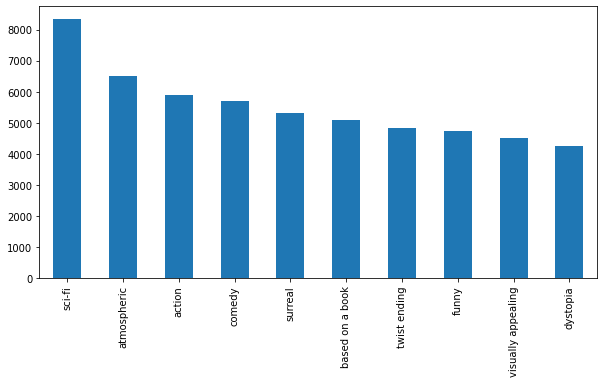

In [ ]:
tag_counts = tag['tag'].value_counts()
tag_counts[:10].plot(kind='bar', figsize=(10,5))

### Ratings Data File Structure (ratings.csv)
-----------------------------------------

Оценки пользователей за фильмы представлены в файле `ratings.csv`. Каждая строка записана в следующем формате:

    userId,movieId,rating,timestamp

Строки упорядочены по `userId`, а затем по `movieId`.

Рейтинги предствляют собой школу из 5 звёзд, с использованием половинки звезды (0.5 звёзд до 5.0 звёзд).

In [ ]:
downloaded = drive.CreateFile({'id':"1PZZUhKWPmRCzgwJP9yX5g7ZycV273oVk"}) 
downloaded.GetContentFile('rating.csv')
rating=pd.read_csv('rating.csv')

In [ ]:
rating.sample(10)

,userId,movieId,rating,timestamp
13308677,86113,1101,4.0,1131426921
21542121,140051,380,2.5,1174462325
24682132,160387,480,3.0,835805226
24660636,160256,5526,3.0,1546818194
6935427,44998,539,4.0,965523318
19465131,126359,2067,4.0,1541570945
6873199,44594,531,5.0,1003874603
18783975,121817,2059,4.5,1527195707
21063531,136902,480,4.0,847670472
470676,3231,3330,2.0,957365709


In [ ]:
rating.shape

(25000095, 4)

In [ ]:
rating['userId'].value_counts().shape # посчитаем, сколько у нас пользователей

(162541,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd76aa09550>]],
      dtype=object)

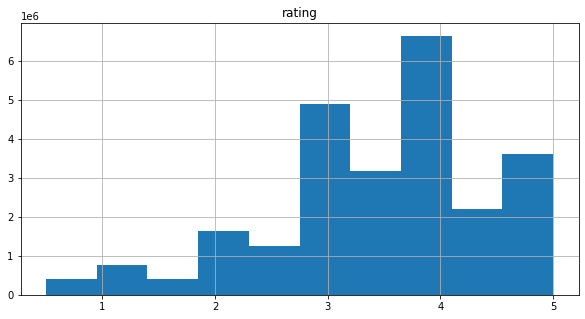

In [ ]:
rating.hist(column='rating', figsize=(10,5)) # гистограмма для рейтингов

### Movies Data File Structure (movies.csv)
---------------------------------------

Информация о фильмах содержится в файле `movies.csv`. Каждая строка представляет информацию об одном фильме в следующем формате:

    movieId,title,genres

Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>, в поле `title` после названия фильма в скобках указан год выпуска. В названиях могут быть ошибки.

Жанры фильма записываются в одном поле через разделитель |. Список допустимых жанров:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


In [ ]:
downloaded = drive.CreateFile({'id':"1Wgw78UNg1uPV238DH0Oj3QYLfgiU7qpg"}) 
downloaded.GetContentFile('movies.csv')
movies=pd.read_csv('movies.csv')

### Tag Genome (genome-scores.csv and genome-tags.csv)
-------------------------------------------------

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Tag genome - это структура данных, которая описывает релевантность тэгов по отношению к фильму. Заданы 1128 тэгов, и по каждому фильму указаны значения релевантности для каждого тэга.

Описание [в статье][genome-paper]. Tag genome был рассчитан с помощью алгоритма на основе пользовательского контента, включая тэги, ретинги и текстовые описания.

Файл `genome-scores.csv` содержит релевантность тэгов по отношению к фильмам:

    movieId,tagId,relevance

Файл `genome-tags.csv` содержит описания тэгов:

    tagId,tag

`tagId` значения сгенерированы в тот момент, когда экспортировался весь набор данных, так что `tagId` могут быт не такими как в других версиях датасетов от MovieLens (например, 1М и 20M).

> Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Encoding Community Knowledge to Support Novel Interaction. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1–13:44. <https://doi.org/10.1145/2362394.2362395>


In [ ]:
downloaded = drive.CreateFile({'id':"1k4ZwrBeCO80LHThymYzHfD_H-gGCaMr8"}) 
downloaded.GetContentFile('genome-scores.csv')
genome_scores=pd.read_csv('genome-scores.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"12lE3TfDja2VPrqbHpXc92m2r0Sdf0Sog"}) 
downloaded.GetContentFile('genome-tags.csv')
genome_tag=pd.read_csv('genome-tags.csv')

In [ ]:
genome_scores[genome_scores.movieId == 442]

,movieId,tagId,relevance
474888,442,1,0.04525
474889,442,2,0.04575
474890,442,3,0.03475
474891,442,4,0.04700
474892,442,5,0.06375
...,...,...,...
476011,442,1124,0.04400
476012,442,1125,0.03250
476013,442,1126,0.00800
476014,442,1127,0.11775


In [ ]:
genome_tag[genome_tag.tag == 'dragon']

,tagId,tag
320,321,dragon


In [ ]:
dragon_movies = tag[tag.tag == 'dragon']
movies[movies.movieId.isin(dragon_movies.movieId)]

,movieId,title,genres
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
642,653,Dragonheart (1996),Action|Adventure|Fantasy
1007,1030,Pete's Dragon (1977),Adventure|Animation|Children|Musical
1818,1907,Mulan (1998),Adventure|Animation|Children|Comedy|Drama|Musi...
2006,2096,Sleeping Beauty (1959),Animation|Children|Musical
...,...,...,...
51002,182211,Hell's Bells (1929),Animation
52170,184719,Achoo (2017),Animation|Comedy
52748,185961,Airlords of Airia (2013),Sci-Fi
53177,186881,Butter on the Latch (2013),Drama|Fantasy|Horror


### Links Data File Structure (links.csv)
---------------------------------------

Идентификаторы фильмов с других ресурсов содержатся в файле `links.csv`. Каждая строка представляет собой один фильм в следующем формате:

    movieId,imdbId,tmdbId

movieId - идентификатор фильма на <https://movielens.org>. Например, фильм Toy Story имеет ссылку <https://movielens.org/movies/1>.

imdbId - идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>.

tmdbId is - идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.



In [ ]:
downloaded = drive.CreateFile({'id':"1kx_nH4Sv9h1h9fXoLN6531YZWsDxXqO-"}) 
downloaded.GetContentFile('links.csv')
link=pd.read_csv('links.csv')

In [ ]:
link[link.movieId == 1]

,movieId,imdbId,tmdbId
0,1,114709,862.0


### Понимание данных

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Представление жанров не очень хорошее, не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создаётся новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 - если не было. (Этот подход чем-то похож на one-hot encoding).

Вторая проблема с данными: наличие в столбце title года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец.

In [ ]:
data = pd.merge(movies,rating)

In [ ]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [ ]:
data.sample(10)

,movieId,title,genres,userId,rating,timestamp
21103685,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,50720,4.0,1553287376
12610593,2967,"Bad Seed, The (1956)",Drama|Thriller,137100,3.5,1059970302
12211855,2819,Three Days of the Condor (3 Days of the Condor...,Drama|Mystery|Romance|Thriller,19517,4.0,1356843885
5629354,1059,William Shakespeare's Romeo + Juliet (1996),Drama|Romance,47960,4.0,1467920424
989877,141,"Birdcage, The (1996)",Comedy,145988,5.0,849631627
17437947,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,84946,3.5,1198292131
6663644,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,148113,4.5,1111792320
2933990,431,Carlito's Way (1993),Crime|Drama,133041,5.0,1340277706
6927870,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,114927,3.5,1556476470
13584092,3424,Do the Right Thing (1989),Drama,80218,4.0,1042645894


In [ ]:
data.shape

(25000095, 6)

In [ ]:
number_rating = data.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.head()

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",179
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3


In [ ]:
data_train = data.sample(10000)
# у меня начиная с 100K не хватает оперативной памяти для построения сводной таблицы.
# на 50K долго считаются статистики 

In [ ]:
data_train.head()

,movieId,title,genres,userId,rating,timestamp
3948319,590,Dances with Wolves (1990),Adventure|Drama|Western,58439,5.0,952724803
8817090,1688,Anastasia (1997),Adventure|Animation|Children|Drama|Musical,9996,3.0,922458961
21837950,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,24779,5.0,1281557081
14885388,4034,Traffic (2000),Crime|Drama|Thriller,89178,2.0,1027128263
21225732,59315,Iron Man (2008),Action|Adventure|Sci-Fi,61252,3.0,1560976234


In [ ]:
movie_pivot = data_train.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [ ]:
movie_pivot.head()

title,(500) Days of Summer (2009),*batteries not included (1987),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),12 Strong (2018),12 Years a Slave (2013),127 Hours (2010),13 (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),16 Blocks (2006),17 Again (2009),1922 (2017),1941 (1979),1984 (Nineteen Eighty-Four) (1984),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Bullets (L'immortel) (2010),22 Jump Street (2014),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),2:37 (2006),3 Days to Kill (2014),...,X2: X-Men United (2003),Xanadu (1980),"Yards, The (2000)","Year of Living Dangerously, The (1982)",Yellow Submarine (1968),Yes Man (2008),"Yes Men, The (2003)","Yesterday, Today and Tomorrow (Ieri, oggi, domani) (1963)",Yojimbo (1961),You Can Count on Me (2000),You Don't Mess with the Zohan (2008),You Only Live Once (1937),You Only Live Twice (1967),You and Your Food (1955),You've Got Mail (1998),"You, Me and Dupree (2006)",Young Adult (2011),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),"Yours, Mine and Ours (2005)",Youth Without Youth (2007),Youth of the Son (1952),Z for Zachariah (2015),Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zootopia (2016),Zulu (1964),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Матрица предпочтений состоит практически из одних нулей.

На такой матрице практически невозможно найти хоть что-то. Например, поищем похожий фильм.

In [ ]:
watched_movie = movie_pivot['10 Things I Hate About You (1999)']

In [ ]:
similar_movies = movie_pivot.corrwith(watched_movie)
similar_movies = similar_movies.sort_values(ascending=False)
similar_movies.head()

## Задание 2.1

Выход из этой ситуации такой.

Будем делать рекомендации не всем и сразу, а конкретному пользователю. Формировать `movie_pivot` будем только для этого конкретного пользователя.

1. Возьмём все оценки, которые поставил пользователь $U$
2. По фильмам $M_U$, которые он оценил, получим всех пользователей, которые ставили этим фильмам оценки
3. Скорее всего и на этом этапе список получится большим (для случайного пользователя у меня получилось 1.7 миллионов строк). Например, оставить только пользователей, у которых много общих фильмов.
4. Для каждого пользователя посчитаем похожесть (например, корреляцию)
5. Отсортируем пользователей по похожести.
6. Оставим только $k$ самых похожих пользователей. 

Пример решения:

Выбираем случайного прльзователя

In [ ]:
all_users = rating['userId'].value_counts()
user = all_users.sample(1).index
user

Получаем фильмы, которые пользователь посмотрел

In [ ]:
user_movies = data[data.userId == user[0]]
user_movies = user_movies.drop(['genres', 'timestamp', 'userId'], axis = 1)
user_movies.head()

,movieId,title,rating
33665,1,Toy Story (1995),3.0
876728,110,Braveheart (1995),5.0
1137734,160,Congo (1995),4.0
1156627,161,Crimson Tide (1995),5.0
1230755,168,First Knight (1995),4.0


Теперь найдём пользователей, которые смотрели эти фильмы

In [ ]:
new_data = data[data.movieId.isin(user_movies.movieId)]
new_data = new_data.drop(['genres', 'timestamp'], axis = 1)
new_data.sample(10)

,movieId,title,userId,rating
2736504,377,Speed (1994),7218,5.0
17052951,5952,"Lord of the Rings: The Two Towers, The (2002)",153054,3.0
9694235,2006,"Mask of Zorro, The (1998)",29072,4.0
3926271,589,Terminator 2: Judgment Day (1991),142749,5.0
17154812,5995,"Pianist, The (2002)",155784,4.5
1159110,161,Crimson Tide (1995),113641,5.0
13910394,3578,Gladiator (2000),103089,3.0
5483565,1027,Robin Hood: Prince of Thieves (1991),140361,5.0
16144266,4995,"Beautiful Mind, A (2001)",115036,3.0
15968566,4963,Ocean's Eleven (2001),100906,3.5


Как по ID пользователя получить список его фильмов:

In [ ]:
users_group = new_data.groupby(['userId'])
users_group.get_group(user[0])

In [ ]:
user[0]

95537

In [ ]:
sorted_users_group = sorted(users_group,  key=lambda x: len(x[1]), reverse=True)
sorted_users_group[:3]

Выведем ID пользователя, у которого больше всего одинаковых фильмов

In [ ]:
similar_movies_user = sorted_users_group[1][0] # скорее всего, в sorted_users_group[0][0] сидит сам пользователь

In [ ]:
person2 = users_group.get_group(similar_movies_user).sort_values(by='movieId')

Получим список одинаковых фильмов для двух пользователей с оценками.

In [ ]:
temp = user_movies[user_movies['movieId'].isin(users_group.get_group(similar_user)['movieId'])]

In [ ]:
person1 = temp.sort_values(by='movieId')

Посчитаем коэффициент корреляции Пирсона для этих двух пользователей


In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(person1.rating, person2.rating)[0]

Дальше нужно дописать самостоятельно. Нужно пройтись по всем пользователям и отсортировать их по похожести и оставить $k$ самых похожих.

In [ ]:
random_users = new_data.sample(50)
random_users = random_users.userId.unique()

In [ ]:
pearsonCorDict = {}
for u in random_users:
  person2 = users_group.get_group(u).sort_values(by='movieId')
  temp = user_movies[user_movies['movieId'].isin(users_group.get_group(u)['movieId'])]
  person1 = temp.sort_values(by='movieId')
  if pearsonr(person1.rating, person2.rating)[0] > 0.0: # оставляем только пользователей с неотрицательной корреляцией
    pearsonCorDict[u] = pearsonr(person1.rating, person2.rating)[0]

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:7]
topUsers

Теперь у нас есть похожие пользователи. Получим оценки, которые они ставили за все фильмы.

In [ ]:
topUsersRating=topUsers.merge(data, left_on='userId', right_on='userId', how='inner')
topUsersRating.sample(10)

Уберём лишние столбы и получим взвешенную оценку за фильм

In [ ]:
topUsersRating = topUsersRating.drop(['genres', 'timestamp'], axis = 1)
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

Теперь нужно сгруппировать по фильмам и получить сумму взвешенных оценок 

In [ ]:
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

Теперь можно получить рекомендацию:

In [ ]:
recommendation_df = pd.DataFrame()
recommendation_df['score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df = recommendation_df.sort_values(by='score', ascending=False)

In [ ]:
recommendation_df

In [ ]:
recommendation_df = recommendation_df[recommendation_df.score > 4.5]

In [ ]:
recommendation_df = recommendation_df.drop(['movieId'], axis = 1)

In [ ]:
recommendation_df

In [ ]:
recommended_movies=recommendation_df.merge(movies, how = 'inner', on = 'movieId')

In [ ]:
recommended_movies

Что-то получилось. Но теперь нужно оценить качество этой рекомендации. Идея тут такая: разделить исходын данные на train и test. Получить предсказания на train и проверить их на test.

## Задание 2.2

Мы всё ещё не смотрим в контент, хотя его тут очень много. 

Попробуйте по этим данным сделать рекомендацию на основе контента.

Идея тут может быть такой: смотрим на описание фильмов тэгами, а когда пользователь ставит оценку за фильм, мы её засчитываем как оценку за тэги.

Если уж совсем не получится с рекомендательной системой, то можно заняться EDA на этих данных. Например, посмотреть как менялась популярность тэгов со временем, или сделать кластеризацию тэгов или кластеризацию фильмов. 

## Определение


**Рекомендательные системы** - программы, которые пытаются предсказать, какие объекты будут интересны пользователю, имея определенную информацию о его профиле.

**История**. Первой исследовательской работой по рекомендательным системам считается работа Lee Giles "An autonomous Web Agent for Automatic Retrieval and Identification of Interesting Publications"1998 года. Однако
первой печатной правильнее назвать работу 1992 года David Goldberg, David Nichols "Using collaborative filtering to weave an information Tapestry".  В этой работе был описан принцип работы экспериментальной почтовой системы Taperstry. Разработчики Tapestry первыми использовали термин "коллаборативная фильтрация"как метод сбора качественных
данных. Данная система была разработана в Xerox PARC как способ обработки большого количества сообщений электронной почты и сообщений, отправляемых в группы новостей. Особенностью данной системы было то, что система собирала и анализировала данные о реакции людей на прочитанные ими документы, в следствие чего процесс фильтрации
стал более эффективным.


Одновременно с Taperstry развивались и другие рекомендательные системы на основе коллаборативной фильтрации:
* В 1995-1996 годах были разработана сразу три системы для рекомендации музыки: Helpful Online Music Recommendations, Ringo, Firefly.
* Также в то время активно развивались системы рекомендаций наиболее интересных и популярных страниц в интернете: Point’s Top 5%, PHOAKS (People Helping One Another Know Stuff), Webdoggie, Alexa Internet.

Метод Item-based был изобретен и использован Amazon.com в 1998 году. Впервые представлен публике на научной конференции в 2001, а его авторы в 2016 получили награду Test of Time.


**Обзор и постановка задачи**

Основная задача рекомендательных систем - проинформировать пользователя о товаре или услуге, которая будет для него наиболее интересной и актуальной. 

Разнообразие таких систем можно проиллюстрировать основными характеристиками:
* Вид рекомендательной системы.
* Цель рекомендации.
* Объект рекомендации.
* Контекст рекомендации.
* Способы сбора данных.
* Степень персонализации.
* Формат выдачи рекомендации.



### Вид рекомендательной системы

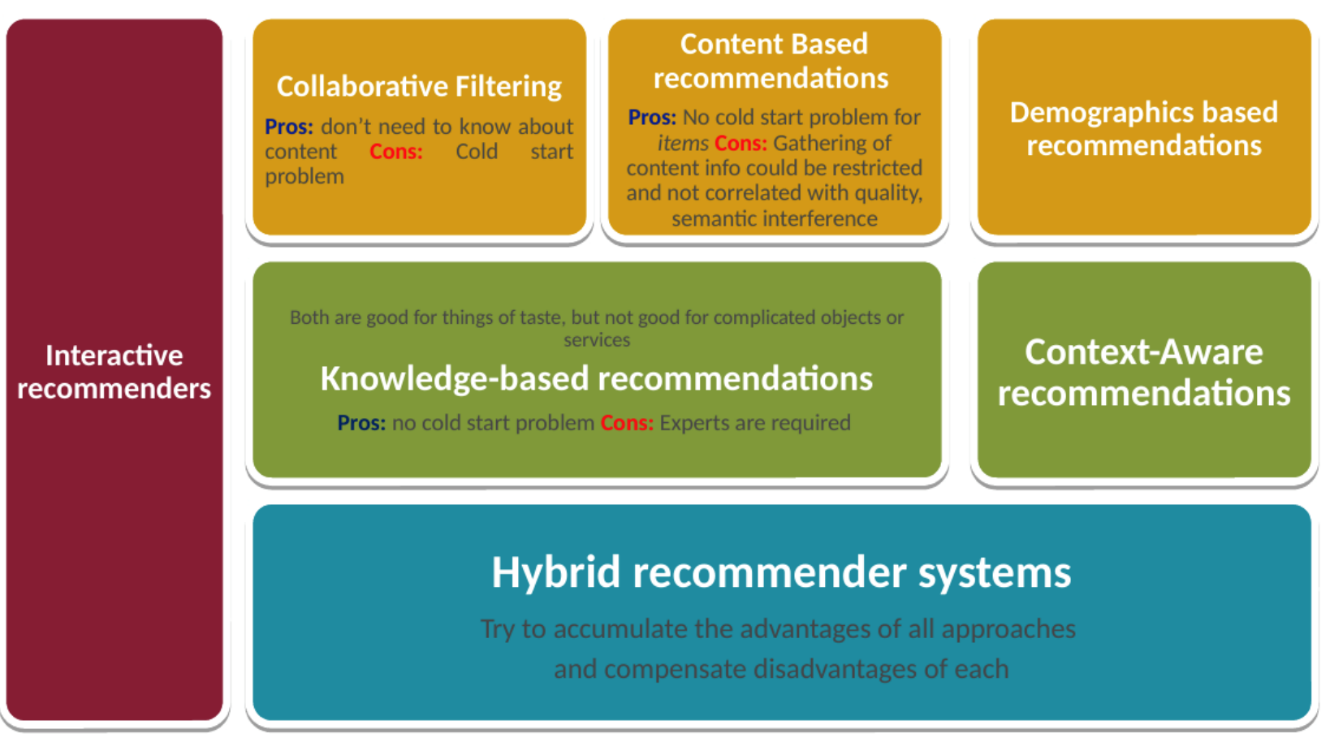



* Сontent based рекоммендеры. Чтобы решить проблему холодного старта и рекомендовать новые элементы, коллаборативную фильтрацию иногда интегрируют с content based рекоммендерами. При этом подходе нужно содержательно описать все айтемы.

* Demographic based рекоммендеры. Если холодный старт произошел для пользователя, то нам нужно собрать о нем информацию и описать его. 

* Knowledge based рекоммендеры. Здесь требуются эксперты, которые оценивают предлагаемые объекты и описывают критерии, по которым их выбирают пользователи. Считается, что эти эксперты знают все: к какому типу пользователей вы принадлежите, сколько хотите потратить, какими характеристиками должны обладать товары, чтобы привлечь вас. Таким образом решается проблема и для пользователей, и для айтемов. Но тут есть недостаток: эксперты – очень дорогие и ненадежные люди, поэтому не всегда возможно описать все правила для вашего каталога.

* Сontext-aware рекоммендеры. Условия, в которых пользователь получает рекомендацию, со временем могут меняться. Чтобы эффективно делать контекстные рекомендации, нужно работать с временными рядами. Если поведение пользователя резко меняется, это значит, что резко изменился контекст.

* Интерактивные рекоммендеры. Их главная цель – в режиме текущей сессии пользователя выбрать варианты, наиболее релевантные его пожеланиям.

### Цель рекомендации

Самая понятная цель - продать что-то пользователю. А ещё можно пользователя удерживать как можно дольше на сайте,  увеличивая его лояльность. 

Компании–лидеры в рекомендательных системах в
основном делятся на две категории:
1. мы «продаём» какие-то товары или услуги онлайн; у нас
есть пользователи, которые либо явно оценивают товары,
либо просто что-то покупают, а что-то нет; интересно
порекомендовать товар, который данному покупателю
максимально понравится (Netflix, Amazon);
2. мы – портал, делаем деньги тем, что размещаем рекламу,
надо разместить ссылки, по которым пользователи захотят
переходить (и видеть ещё больше вкусной рекламы);
Yahoo!, Google, Яндекс, большинство новостных сайтов

Цель рекомендации отражается в формулировке оффлайн-метрик для оценки качества рекомендаций. Например, рекомендательная система интернет-магазина в нужный момент делает интересные именно им предложения, увеличивая доход интернет-магазина за счет роста конверсии, среднего чека и частоты повторных покупок. Оффлайн метрики можно оценить только по результатам [А/Б тестов](https://ru.wikipedia.org/wiki/A/B-%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5).

Большое влияние на развитие рекомендательных систем оказал конкурс от Netflix. Цель соревнования — обогнать существующую систему рекомендаций Cinematch по метрике RMSE на 10 %. Задача может показаться не такой сложной, но для достижения требуемого качества потребовалось переоткрывать соревнование два раза — решение было получено только на 3 год соревнования. 

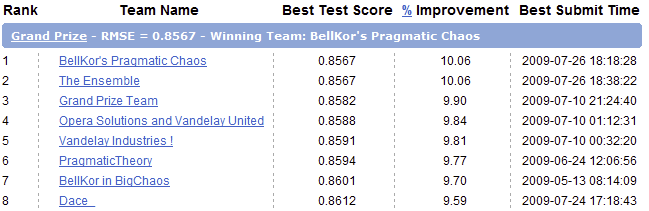

Netflix выплатил обещанный миллион долларов победителям, но так никогда и не использовал полученное решение. Причин на то было несколько: сама метрика RMSE оказалась не слишком пригодной для бизнеса. Да и сам бизнес за три года сильно изменился.

**Long tail**

Существует небольшое количество айтемов, о которых и так все знают. Нет большого смысла их рекомендовать, потому что пользователь, скорее всего, либо уже их видел и просто не поставил оценку, либо и так о них знает и собирается посмотреть (или не смотреть). 

Подавляющее количество айтемов практически никто не видел. Делать рекомендации из этой части полезней: там есть интересный контент, который пользователь вряд ли сможет найти сам.

**Exploration vs Exploitation**

Допустим, мы точно знаем, что нравится пользователю. Значит ли это, что мы должны рекомендовать одно и то же? Есть ощущение, что такие рекомендации быстро наскучат и стоит иногда показывать что-то новое. Когда мы рекомендуем то, что точно должно понравиться — это exploitation. Если мы пробуем добавить в рекомендации что-то менее популярное или как-то их разнообразить — это exploration. Хочется балансировать эти вещи.

### Объект рекомендации
-----------------------------------------------

Рекомендательные системы различаются прежде всего по тем объектам, которые они предлагают пользователям. Существует множество вариаций задачи рекомендаций и в каждой есть свои нюансы. Прежде всего рекомендуемые объекты определяют специфику системы. 

Одни подходы хорошо подходят для рекомендации объектов, выбор которых зависит от вкуса пользователя, например, для рекомендации фильмов или музыки. Но этот подход не эффективен, когда нужно рекомендовать такие сложные объекты, как машины, недвижимость и т.д. У пользователя не может быть слишком много опыта покупки подобных объектов.

Мы работали с системой рекомендаций фильмов. Но, что если мы рекомендуем новости? Новости, в отличие от фильмов, быстро устаревают — нужно показывать пользователям свежие статьи, пока они ещё актуальны. При этом необходимо понимать содержание статьи, источник, в котором она была опубликована.

Если мы хотим рекомендовать пользователю, маршрут по городу, фактически у нас часто нет никакой истории взаимодействия пользователей с возможными объектами. Кроме того, подобные системы должны также учитывать и предпочтения пользователя и контекст (день недели, время года и т.п.).

В системах, которые рекомендуют материалы для изучения, рекомендации должны учитывать уровень подготовки пользователя. Отдельный класс подобных систем называется адаптивные обучающие системы.

Иногда, рекомендация может быть составной. Например, мы рекомендуем ресторан и конкретные блюда, которые стоит в нём попробовать.


### Контекст рекомендации

CARS (context-aware recommender systems) дают рекомендации в контексте:
* временном;
* ситуативном;
* географическом;
* предшествующего поведения пользователей и т.д.

Самое очевидное использование контекста: учёт изменений сезонного спроса. Перед Хэллоуином вам могут порекомендовать список с фильмами ужасов, в конце года добрую рождественскую коммедию, а в начале мая - фильм о второй мировой войне. Такие изменения лишь отчасти являются персонализированными, ведь нужно учитывать культурные особенности, например, страны, в которой живёт пользователь. 

У рекомендательной системы есть два разных «уровня»,
на которых она должна работать:
* глобальные оценки, медленно меняющиеся особенности и
предпочтения, интересные страницы, зависимость от user
features (география, пол etc.) и т.д.;
* кратковременные тренды, hotness, быстрые изменения
интереса во времени.

Это очень разные задачи с разными методами, поэтому
различают два класса моделей.
* Оффлайн-модели выявляют глобальные закономерности
(обычно это и называется коллаборативной фильтрацией).
Цель зачастую в том, чтобы найти и рекомендовать
человеку то, что ему понравится, из достаточно редких
вещей, работать с «длинными хвостами» распределений
интересов людей и веб-страниц.
* Онлайн-модели должны реагировать очень быстро
(поэтому там обычно подходы попроще, как правило, не
индивидуализированные), они выявляют кратковременные
тренды, позволяют рекомендовать то, что hot прямо
сейчас.


В уже упомянутом конкурсе от Netflix одна из команд обнаружила интересную закономерность:

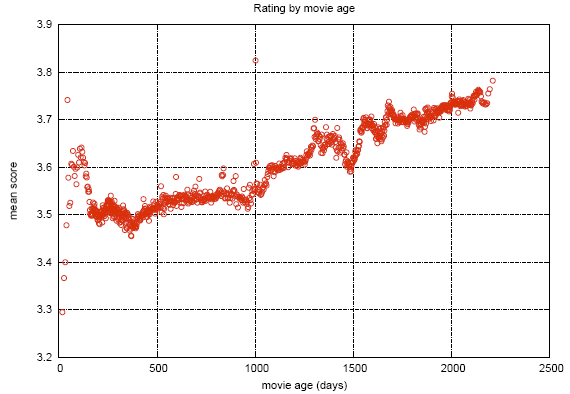

На этом графике показано, как изменяется средняя оценка фильмов после выхода. Видно, что за 2000 дней оценка поднимается на 0.2. То есть, после того как фильм перестал быть новым, его начинают смотреть те, кто достаточно сильно уверен в том, что фильм ему понравится, что повышает средний рейтинг фильма.

Самые продвинутые рекомендательные системы пытаются учесть изменения вкусов пользователя. Например, это можно делать учитывая старые оценки с меньшим весом. 

### Способы сбора данных

*Явный (explicit feedback)*

Матрица оценок — это пример explicit-данных. Лайк, дислайк, рейтинг — пользователь сам явно выразил степень своего интереса к объекту. Таких данных обычно не очень много. В видео-стриминговых сервисах около двух третей пользователей не имеют ни одной оценки.

Если мы собираем только явные сигналы, то не всегда понятно, что означает его отсутствие: может быть пользователь вообще не знает ничего про объект, а может быть пользователь знает про объект, но он ему неинтересен. 

*Неявный (implicit feedback)*

Гораздо больше данных можно собрать о неявных предпочтениях — просмотры, клики, добавление в закладки, настройка уведомлений. Но неявный фидбэк сложно поддаётся интерпретации.

Ещё одним важным моментом является выбор способо сбора данных об объектах. Мы с вами разобрали пример с набором данных от MovieLens, в котором фильмы описываются названеем, годом производства, жанрами и тэгами, а также имеют ссылки на внешние источники, с которых пожно собирать описание.

Например, в рекомендательной системе от Spotify в качестве основы используется коллаборативная фильтрацию: отслеживаются предпочтения пользователей, и на основе этих предпочтений пользователей кластеризуют. Также делается проекция намерения (интент, intent - термин, часто использующийся в среде) пользователя в данный момент времени на пространство музыкальных интересов (то есть учёт контекста). Также Spotify использует NLP-методы (natural language processing) для анализа плейлистов. Рекомендательная система собирает данные о всех плейлистах пользователей и говорит, что ваш плейлист – это такой же текстовый документ. Также они пропускают треки через глубокую нейросеть, чтобы извлечь дополнительные признаки объекта песне. Это очень сложно составленый content-based рекоммендер.

### Степень персонализации

Оффлайн-системы (персонализированные):
1. коллаборативная фильтрация, метод ближайших соседей;
2. SVD - как логическое развитие;
3. расширения: контент, контекст.

Онлайн-системы (поиск трендов):
1. предсказания популярности;
2. explore-exploit;
3. расширения: многокритериальная оптимизация, частичная
персонализация.

### Формат рекомендации

Классические форматы выдачи рекомендации: с этим товаром часто покупают это. Но, естественно, этим не ограничиваются разные способы выдачи рекомендаций.

Разберём на примере музыкальных рекомендательных систем. Вроде бы объекты понятны: музыкальные треки, но их можно рекомендовать разными способами.

* Персонализированные новинки - Премьера
* Персональная подборка того, что вам нравится — Плейлист Дня
* Персональная подборка того, что вам нравится — Плейлист с Алисой
* Персональная подборка треков, которые пользователь еще не слышал — Дежавю
* Находится в библиотеке, но еще не прослушано — Тайник
* Плейлист самых любимых треков за всё время - Большая перемотка
* Подборки по стилям - Радио
* Подборки по активностям и настроению - Радио

В Яндекс.Музыке нет, но есть в других сервисах.
* Треки, которые ты сформировали твои вкусы — Your Time Capsule
* Треки, которые, возможно, понравятся, но отличаются от того, что пользователь обычно слушает — Taste breakers
* Треки артистов, которые выступают в твоем городе

Кроме того, очень важным для рекомендательных систем является то, как вы преподносите рекомендацию пользователю. Например, в Netflix один и тот же фильм разным пользователям могут рекомендовать с разными превьюшками https://netflixtechblog.com/artwork-personalization-c589f074ad76.

Важным для выдачи рекомендации является её прозрачность. Пользователь должен понимать, почему он получил ту или иную рекомендацию.

[Filter bubble](https://ru.wikipedia.org/wiki/%D0%9F%D1%83%D0%B7%D1%8B%D1%80%D1%8C_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%BE%D0%B2): негативная сторона рекомендательных систем. Рекомендуем только то, что пользователь хотел бы увидеть, основываясь на информации о его месторасположении, прошлых действиях и предпочтениях. В результате пользователь оказывается в информационном пузыре. Можно до конца жизни рекомендовать одно и то же. Но иногда полезно вывести человека за его привычный круг.

Для этого вводятся метрики разнообразия:
* diversity – разнообразие, мера похожести элементов списка;
* novelty – новизна для пользователя, распространённость
продукта, доля его рейтингов;
* serendipity – неожиданность, сюрприз, похожесть на
историю пользователя.


### Источники

[Рекомендательные системы](http://neerc.ifmo.ru/wiki/index.php?title=%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B )

[Анатомия рекомендательных систем](https://habr.com/ru/company/lanit/blog/420499/ )

[Обзор от EPAM](https://habr.com/ru/company/epam_systems/blog/335114)

[Как работают рекомендательные системы (Яндекс)](https://habr.com/ru/company/yandex/blog/241455/)

[Рекомендательные системы: идеи, подходы, задачи ](https://habr.com/ru/company/jetinfosystems/blog/453792/)

[10 лайфхаков разработки рекомендательных систем](https://habr.com/ru/post/476224/)